In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import sys
import os
#Perform the necessary pull of some helper functions.
import lmfit
from lmfit import Model
import scipy
import matplotlib
import matplotlib.pyplot as plt
# To match plot styles in the draft.
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
plt.rcParams['font.size']=10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='serif'
%matplotlib inline
import bnrof
from mantid.simpleapi import *
import MDUtils as mdu
from bnrof import IEXY_data
from bnrof import Material
from mantid.geometry import CrystalStructure, ReflectionGenerator, ReflectionConditionFilter

FrameworkManager-[Notice] Welcome to Mantid 6.7.0
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid6.7


## This notebook contains all of the analysis and figure generation for the BNRO MACS measurements.

In [2]:
%matplotlib inline

In [3]:
macs_T_fname = 'MACS Data files/t_dependence_macs.iexy'
Ei=3.7
cell_vol = 820.6
neutron_d = 1.5
abs_Ba=1.1
abs_Nb=1.15
abs_Ru = 2.56
abs_O=0.0
sigma_abs =3.0*(abs_Ba*4.0+abs_Nb*1.0+abs_Ru*3.0+abs_O*12.0 )

BNRO = Material('Ba4NbRu3O12_refined-structure.cif')
macs_elastic_IEXY = bnrof.IEXY_data(macs_T_fname,Ei=3.7)
#Scale for normalization - comes from only accessible bragg peak
e_res = 0.2 
# Need to translate e_res FWHM into an integral because I'm not sure if it's just as simple as dividing by the resolution
sigma_e = 0.2 / 2.355
peak_I  = 5.5e5
espace = np.linspace(-1,1,1000)
def gaussianfunc(x,A,sigma):
    return A*np.exp(-x**2 / (2.0*(sigma**2)))
e_eval = gaussianfunc(espace,peak_I,sigma_e)
integral_e = np.trapz(e_eval,x=espace)

q_int_seq = 5.8e-3
e_res_seq = 1.6
q_integral = 5.067e3
q_integral = 7.1e3 #[ 1 0 -5 ] peak

energy_eval = np.linspace(-0.2*3.0,0.2*3.0,1000)
gausseval = gaussianfunc(energy_eval,peak_I,0.2 / (2.355*0.2))
#For the [1 0 4 ] peak
#q_integral = 2.9e3


seq_scale = 316.5 / 1.0 # Normalized to per trimer
multiplicity = 6.0

ratio = (q_int_seq)/(q_integral)
print('Ratio='+str(ratio))
print('Ratio norm factor='+str(ratio*1473.6))

norm_factor = BNRO.theory_bragg_I(1.65,intQ=q_integral*sigma_e,intE=1.0,H=1.0,K=0.0,L=-5,sample_mass=20.0)

norm_factor = norm_factor / 3.0# Normalize to per f.u.
norm_factor = norm_factor  / multiplicity
#theory_bragg_I = theory_bragg_I
#norm_factor = theory_bragg_I
print('normalization factor = '+str(norm_factor))

macs_elastic_IEXY.scale_iexy(norm_factor)
#Correct for absorption
absorb_pct = BNRO.calc_sample_absorption(Ei=3.7,deltaE=0.0,d_eff=1.0)
print('Absorb pct='+str(absorb_pct))
macs_elastic_IEXY.scale_iexy(1.0/absorb_pct)


######################

a = 5.75733 Ang
b = 5.75733 Ang
c = 28.587 Ang
alpha = 90.0 Ang
beta = 90.0 Ang
gamma = 120.0 Ang
R -3 m
Space group: R -3 m
Unit Cell Volume =820.619
Formula weight = 1137.42
Formula units per unit cell = 3
Ba4NbRu3O12_refined-structure.cif imported successfully.

###################### 

Ratio=8.169014084507042e-07
Ratio norm factor=0.0012037859154929577
DownloadInstrument-[Notice] All instrument definitions up to date
normalization factor = 0.0010371587575627157
Mean elastic path length for Ei=3.7meV = 7.91 cm
Absorb pct=0.8811760551535924


## Use cuts along $Q$-axis to evaluate spin correlations and sum rules. 

CreateWorkspace-[Notice] CreateWorkspace started
CreateWorkspace-[Notice] CreateWorkspace successful, Duration 0.02 seconds
MagFormFactorCorrection-[Notice] MagFormFactorCorrection started
MagFormFactorCorrection-[Notice] MagFormFactorCorrection successful, Duration 0.00 seconds
d1_A=0.613+/-0.123
d1_d=12.0 (fixed)
lin_FF_A=0.0+/-0.0
CreateWorkspace-[Notice] CreateWorkspace started
CreateWorkspace-[Notice] CreateWorkspace successful, Duration 0.01 seconds
MagFormFactorCorrection-[Notice] MagFormFactorCorrection started
MagFormFactorCorrection-[Notice] MagFormFactorCorrection successful, Duration 0.00 seconds
CreateWorkspace-[Notice] CreateWorkspace started
CreateWorkspace-[Notice] CreateWorkspace successful, Duration 0.01 seconds
MagFormFactorCorrection-[Notice] MagFormFactorCorrection started
MagFormFactorCorrection-[Notice] MagFormFactorCorrection successful, Duration 0.00 seconds
[[Model]]
    ((Model(fourier, prefix='d1_') + Model(fourier, prefix='d2_')) + Model(self_fourier, prefi

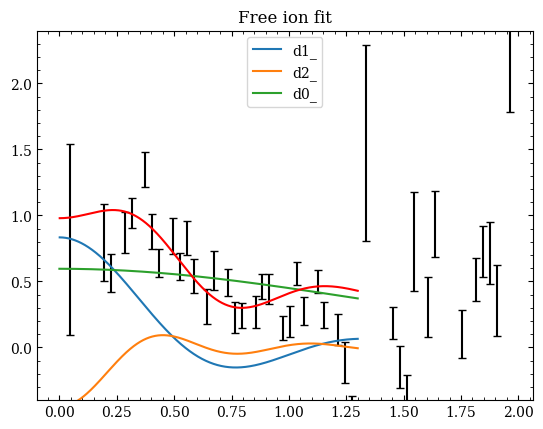

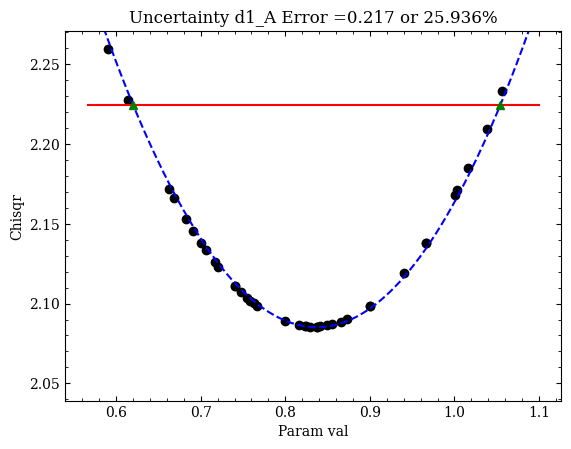

[=============                           ] 1/3 ( 33%) 2 to go

Evaluating Uncertainty for d2_A


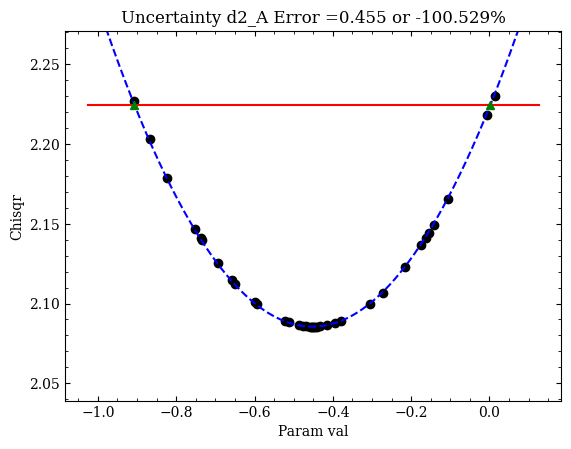

[==========================              ] 2/3 ( 66%) 1 to go

Evaluating Uncertainty for d0_C
Insufficient number of points under max chisqr. Recursively iterating.
Good points: 27/30


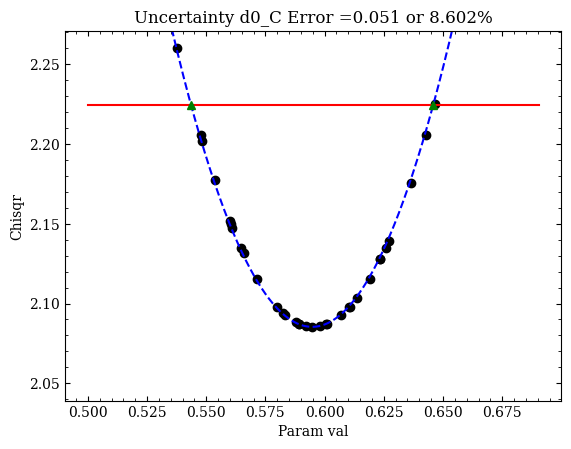

[========================================] 3/3 (100%) 0 to go

free_Ru_param_errs:
d1_A=0.833+/-0.217
d2_A=-0.45+/-0.455
d0_C=0.595+/-0.051
[[Model]]
    ((((Model(trimer_scattering_inplaneNN, prefix='NN_') + Model(trimer_scattering_inplaneNNN, prefix='NNN_')) + Model(trimer_scattering_outplane, prefix='out_')) + Model(trimer_scattering_inplane2a, prefix='in2a_')) + Model(trimer_scattering_ff, prefix='ff_'))
[[Fit Statistics]]
    # fitting method   = Powell
    # function evals   = 238
    # data points      = 50
    # variables        = 3
    chi-square         = 47.8718441
    reduced chi-square = 1.01854987
    Akaike info crit   = 3.82522597
    Bayesian info crit = 9.56129498
    R-squared          = 0.99612141
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    NN_A:    0.27039420 (init = 0)
    NNN_A

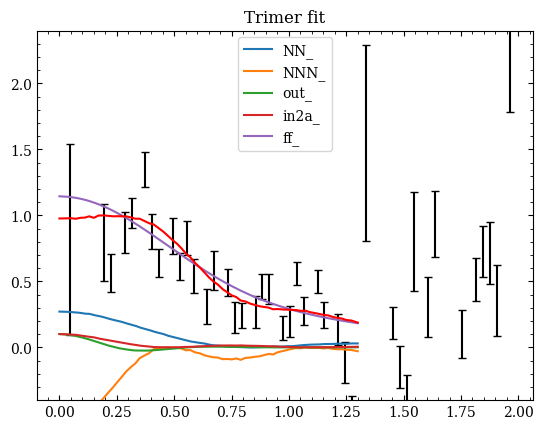

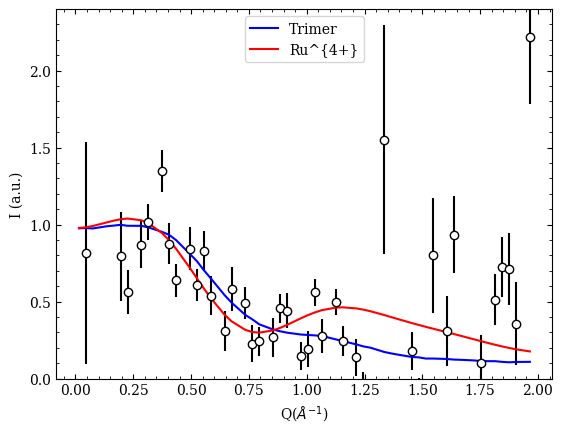

In [4]:
from scipy.interpolate import interp1d

Q,I,err = macs_elastic_IEXY.take_cut('y',[0.0,2.0,0.03],[2.0,5.1],False)
model,result,d = bnrof.extract_Q_correlations(Q,I,err,True,[12.0],mag_FF_file=False,mag_ion='Ru1')
input_q = Q
input_FF=1.0/np.array(bnrof.get_MANTID_magFF(Q,'Ru1')[1])
f_FF = scipy.interpolate.interp1d(input_q,input_FF,kind='linear',fill_value='extrapolate')
FFcorrection= f_FF(input_q) 

def fourier(q,FF,A,d):
    result= A*np.array(FF)*(np.sin(np.array(q)*d)/(np.array(q)*d))
    return result
def self_fourier(FF,C):
    result = FF*C
    return result

prefactor = 3.0/((2.0**2 * 0.5391**2)/1.0)
prefactor=1.0
weights = 1.0/np.array(err)
bad_ind = np.logical_and(Q>0.63,Q<0.7)
weights[bad_ind]=0.0
weights[Q<0.25]=0.0
weights[Q>1.1]=0.0
weights[bad_ind]=0.0

Ru_model = Model(fourier,independent_vars=['q','FF'],prefix='d1_')+Model(fourier,independent_vars=['q','FF'],prefix='d2_')+\
    Model(self_fourier,independent_vars=['FF'],prefix='d0_')
Ru_params = Ru_model.make_params()
Ru_params.add('d0_C',vary=True,value=0.0,min=-10.0,max=10.0)
Ru_params.add('d1_A',vary=True,value=0.1,min=-1,max=1.0)
Ru_params.add('d1_d',vary=False,value=5.75,min=5.0,max=12.0)
Ru_params.add('d2_A',vary=True,value=1.0,min=-100.0,max=100.0)
#params.add('d2_A',expr='0.618*d1_A')
Ru_params.add('d2_d',vary=False,value=9.91,min=5.0,max=12.0)
Ru_result = Ru_model.fit(I,q=Q,FF=input_FF,params=Ru_params,weights=weights,method='ampgo',nan_policy='omit')
eval_q = np.linspace(0,1.3,1000)
eval_FF = 1.0/np.array(bnrof.get_MANTID_magFF(eval_q,'Ru1')[1])
Ru_result_eval = Ru_model.eval(q=eval_q,FF=eval_FF,params=Ru_result.params)
#result_eval_seq = J_model_seq.eval(q=eval_q,FF=eval_FF,params=result_seq.params)
Ru_comps = Ru_result.eval_components(q=eval_q,FF=eval_FF,params=Ru_result.params)
plt.figure()
plt.title('Free ion fit')
plt.errorbar(Q,I,yerr=err,color='k',capsize=3,mfc='w',mec='k',ls=' ')
for comp in Ru_comps:
    plt.plot(eval_q,Ru_comps[comp],label=comp)
plt.plot(eval_q,Ru_result_eval,'r')
plt.legend()
plt.ylim(-0.40,2.4)
NN_D = 5.7
NNN_D = 10.1
local = 2.509
print(Ru_result.fit_report())

fit_errs = 1.0/weights
fit_errs[fit_errs==0]=1e30
init_Ru_chisqr = bnrof.calc_chisqr_val(I,Ru_result.best_fit,fit_errs)
print('init chisqr')
print(init_Ru_chisqr)
Ru_param_errs = bnrof.calculate_param_uncertainty(I,fit_errs,Ru_model,Ru_params,Ru_result,independent_vars={'q':Q,'FF':input_FF},\
                                                  show_plots=True,extrapolate=True,fname='Calculated Uncertainties/elastic_errs_Rufree.txt',overwrite_prev=False,\
                                                  debug=False)

print('free_Ru_param_errs:')
ind = 0
for param in Ru_result.params.keys():
    if Ru_result.params[param].vary==True:
        print(param+'='+str(round(prefactor*Ru_result.params[param].value,3))+'+/-'+\
              str(round(prefactor*Ru_param_errs[param],3)))
        ind+=1

g=2.0
r0=0.5392
cwd = "Anisotropic Form Factor"
NN_inplanef = cwd+'/inplane_nn_el.dat'
NNN_inplanef = cwd+'/inplane_nnn_el.dat'
NN_outplanef = cwd+'/nn_outplane_el.dat'
qavg_FF = cwd+'/trimerff_avg.dat'
q_calc = np.arange(0.01,3.5,0.02) #Same as mathematica
dat_inplane_nn = np.genfromtxt(NN_inplanef)/2.1
dat_inplane_nnn = np.genfromtxt(NNN_inplanef)/2.1
dat_outplane = np.genfromtxt(NN_outplanef)/2.1
dat_ff = np.genfromtxt(qavg_FF)

#Get each of these as a cubic spline function so an arbitrary Q array can be used as input. 
spline_nn_inplane = interp1d(q_calc,dat_inplane_nn,bounds_error=False,fill_value='extrapolate',assume_sorted=True)
spline_nnn_inplane = interp1d(q_calc,dat_inplane_nnn,bounds_error=False,fill_value='extrapolate',assume_sorted=True)
spline_nn_outplane = interp1d(q_calc,dat_outplane,bounds_error=False,fill_value='extrapolate',assume_sorted=True)
spline_qavg_ff = interp1d(q_calc,dat_ff,bounds_error=False,fill_value='extrapolate',assume_sorted=True)
#Define a function to calculate the dispersion with an aribrary scaling factor
def trimer_scattering_inplaneNN(q,A):
    return A*spline_nn_inplane(q)
def trimer_scattering_inplaneNNN(q,A):
    return A*spline_nnn_inplane(q)
def trimer_scattering_inplane2a(q,A):
    return A*spline_nnn_inplane(q)
def trimer_scattering_outplane(q,A):
    return A*spline_nn_outplane(q)
def trimer_scattering_ff(q,A):
    return A*spline_qavg_ff(q)

#def trimer_scattering_inplaneNN(q,A):
#    q,FF=THfuncs.get_MANTID_magFF(q,'Ru0')
#lmfit model
sqT_model = Model(trimer_scattering_inplaneNN,prefix='NN_',independent_vars=['q'])+\
            Model(trimer_scattering_inplaneNNN,prefix='NNN_',independent_vars=['q'])+\
            Model(trimer_scattering_outplane,prefix='out_',independent_vars=['q'])+\
            Model(trimer_scattering_inplane2a,prefix='in2a_',independent_vars=['q'])+\
            Model(trimer_scattering_ff,prefix='ff_',independent_vars=['q'])

sqT_params = sqT_model.make_params()
sqT_params.add('NN_A',vary=True,value=0.0,min=-2,max=2)
sqT_params.add('NNN_A',vary=True,value=0.00,min=-2,max=2)
sqT_params.add('out_A',vary=False,value=0.1,min=-2,max=2)
sqT_params.add('ff_A',vary=True,value=0.0,min=-2,max=2)
sqT_params.add('in2a_A',vary=False,value=0.1,min=-2,max=2)
t_weights = 1.0/np.array(err)
t_weights[Q<0.25]=0.0
t_weights[np.logical_and(Q>0.6,Q<0.7)]=0.0
t_weights[Q>1.2]=0.0
sqT_result = sqT_model.fit(I,q=Q,weights=t_weights,params=sqT_params,method='powell')
sqT_result_eval = sqT_model.eval(q=eval_q,params=sqT_result.params)
print(sqT_result.fit_report())

sqT_param_errs = bnrof.calculate_param_uncertainty(I,fit_errs,sqT_model,sqT_params,sqT_result,independent_vars={'q':Q},\
                                                    show_plots=True,extrapolate=False,overwrite_prev=True,\
                                                    fname='Calculated Uncertainties/sqT_elastic_ru3o12_uncertainties.txt',debug=False)
T_comps = sqT_result.eval_components(q=eval_q,FF=eval_FF,params=sqT_result.params)
plt.figure()
plt.title('Trimer fit')
plt.errorbar(Q,I,yerr=err,color='k',capsize=3,mfc='w',mec='k',ls=' ')
for comp in T_comps:
    plt.plot(eval_q,T_comps[comp],label=comp)
plt.plot(eval_q,sqT_result_eval,'r')
plt.legend()
plt.ylim(-0.40,2.4)         
print('sqT_param_errs:')
for param in sqT_result.params.keys():
    if sqT_result.params[param].vary==True:
        print(param+'='+str(round(1.0*prefactor*sqT_result.params[param].value,3))+\
              '+/-'+str(round(prefactor*np.abs(sqT_param_errs[param]),3)))
        ind+=1
plt.figure()
plt.errorbar(Q,I,yerr=err,marker='o',ls=' ',mec='k',mfc='w',color='k')
plt.plot(Q,sqT_result.best_fit,'b',label='Trimer')
plt.plot(Q,Ru_result.best_fit,'r',label='Ru^{4+}')
plt.xlabel('Q($\AA^{-1}$)')
plt.ylabel('I (a.u.)')
plt.ylim(0,2.4)
plt.legend()
good_i_Ru = np.where(weights>0)[0]
good_i_T = np.where(t_weights>0)[0]
Q_Ru = Q[good_i_Ru]
Q_T = Q[good_i_T]
I_Ru = I[good_i_Ru]
I_T = I[good_i_T]
err_Ru = err[good_i_Ru]
err_T = err[good_i_T]
Ru_FF = 1.0/np.array(bnrof.get_MANTID_magFF(Q_Ru,'Ru1')[1])
theory_Ru = Ru_model.eval(q=Q_Ru,FF=Ru_FF,params=Ru_result.params)
theory_T = sqT_model.eval(q=Q_T,params=sqT_result.params)
chisqr_Ru = np.sum((theory_Ru - I_Ru)**2 / err_Ru**2) / len(I_Ru)
chisqr_T = np.sum((theory_T - I_T)**2 / err_T**2)/ len(I_T)
print('Chisqr free ion = '+str(chisqr_Ru))
print('chisqr trimer = '+str(chisqr_T))

## The plot above demonstrates that with the data, the two models are indistinguishable for the elastic scattering.

Now we evaluate sum rules to find the frozen moment.

In [5]:
binned_IEXY = bnrof.IEXY_data('MACS Data files/t_dependence_macs_binned.iexy',Ei=3.7)
binned_IEXY.scale_iexy(norm_factor)
#Redo this figure to make it nicer
Tbin,Qbin,Ibin,Errbin = binned_IEXY.transform2D()
t_arr = np.unique(macs_elastic_IEXY.q)
int_arr = []
int_err = []
tot_int = 0
for temp in t_arr:
    q,qcut_I,qcut_err = macs_elastic_IEXY.take_cut(cut_axis='y',\
                                               cut_params=[0.25,1.2,0.04],integrated_axis_extents=[temp-0.5,temp+0.5])
    integral = np.trapz(qcut_I,x=q)

    int_arr.append(integral)
    int_err.append(np.mean(qcut_err)/np.sqrt(len(qcut_err)))
q_full = np.linspace(0.01,3.5,1000)
#q_full = q[good_qi]
input_FF = np.array(bnrof.get_MANTID_magFF(q_full,'Ru1')[1])
r0 = 0.5391 
g = 2.0
fq_full = Ru_model.eval(q=q_full,FF=1.0/input_FF,params=Ru_result.params)
X_Q = fq_full*1.0
#fq_full = fq[good_qi]
M_Q = 1.0 / np.array(input_FF)
S_Q = 2.0*X_Q/(M_Q * r0**2 * g**2)
qsqr_sq = (q_full**2)*(S_Q)
qsqr_xq = (q_full**2)*(X_Q)
qsqr = (q_full**2)
int_qsqr_sq = np.trapz(qsqr_sq,x=q_full)
int_qsqr_xq = np.trapz(qsqr_xq,x=q_full)
int_qsqr = np.trapz(qsqr,x=q_full)
mu_eff_sqr  = (3.0/2.0) * int_qsqr_sq / (int_qsqr)
mu_eff = np.sqrt(mu_eff_sqr)

print('Measured mu_eff='+str(round(np.sqrt(mu_eff_sqr),3))+'muB')

CreateWorkspace-[Notice] CreateWorkspace started
CreateWorkspace-[Notice] CreateWorkspace successful, Duration 0.00 seconds
MagFormFactorCorrection-[Notice] MagFormFactorCorrection started
MagFormFactorCorrection-[Notice] MagFormFactorCorrection successful, Duration 0.00 seconds
Measured mu_eff=1.237muB


## Paper plots are now generated below.

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


Mu_eff = 1.24 muB


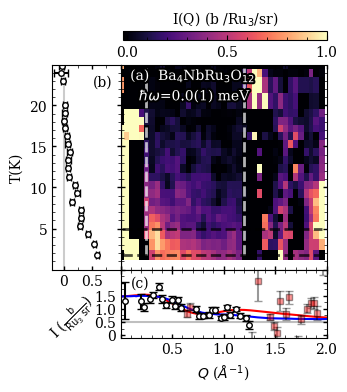

In [8]:
import matplotlib.patheffects as PathEffects
import matplotlib.ticker as ticker
#Main figure
cmap='magma'
vmin=-0.02
vmax=1
majorticklen = 3.0
majortickwid = 1.0
minorticklen = 2.0
minortickwid = 0.5

iscale = 5.0
q_net = q_full
net_eval = Ru_model.eval(q=q_full,FF=1.0/input_FF,params=Ru_result.params)
trimer_eval = sqT_model.eval(q=q_net,params=sqT_result.params)
el_fig = plt.figure(figsize=(3.54, 3.54))
grid = plt.GridSpec(4, 4, hspace=0.0, wspace=0.0)
main_ax = el_fig.add_subplot(grid[:-1, 1:],yticklabels=['',''],xticklabels=['',''])
main_ax.pcolormesh(Qbin,Tbin,Ibin,vmin=vmin,vmax=vmax,cmap=cmap,rasterized=True)
main_ax.yaxis.set_tick_params(which='major',color='k',direction='in',width=majortickwid,length=majorticklen)
main_ax.yaxis.set_tick_params(which='minor',color='k',direction='in',width=minortickwid,length=minorticklen)
main_ax.xaxis.set_tick_params(which='major',color='k',direction='in',width=majortickwid,length=majorticklen)
main_ax.xaxis.set_tick_params(which='minor',color='k',direction='in',width=minortickwid,length=minorticklen)
main_ax.set_yticklabels([])
main_ax.set_xticklabels([])
main_ax.tick_params(labelbottom=False,labeltop=False,labelright=False,labelleft=False)
#some lines to show the integration regions for plots (b) and (c)
main_ax.plot(np.ones(10)*0.25,np.linspace(np.min(t_arr),np.max(t_arr),10),color='w',ls='--',linewidth=2,alpha=0.7)
main_ax.plot(np.ones(10)*1.2,np.linspace(np.min(t_arr),np.max(t_arr),10),color='w',ls='--',linewidth=2,alpha=0.7)
#for q-cut the T integration was from 1.7 to 5K,Q=0 to 2
main_ax.plot(np.linspace(np.min(Qbin),np.max(Qbin),10),np.ones(10)*np.min(t_arr),color='k',ls='--',linewidth=2,alpha=0.7)
main_ax.plot(np.linspace(np.min(Qbin),np.max(Qbin),10),np.ones(10)*5.0,color='k',ls='--',linewidth=2,alpha=0.7)


#Handle the q-cut
qcut_ax = el_fig.add_subplot(grid[-1, 1:], xticklabels=[], sharex=main_ax)
qcut_ax.plot(q_net,net_eval,'r',label='d$_{eff}$='+str(round(result.params['d1_d'].value,2))+' $\AA$')

qcut_ax.plot(q_net,trimer_eval,ls='-',color='b',label='Inelastic Fit')
qcut_ax.tick_params(labelbottom=True,labeltop=False,labelright=False,labelleft=False)

qcut_ax.set_xlabel(r'$Q$ ($\AA^{-1}$)',fontsize=10)
qcut_ax.plot(np.linspace(0,3,100),np.zeros(100),color='k',alpha=0.25)
qcut_ax.set_ylim(-0.6,2)
qcut_ax.set_xlim(0,2.0)
for i in range(len(I)):
    if (Q[i]>0.63 and Q[i]<0.7) or Q[i]>1.25:
        qcut_ax.errorbar(Q[i],I[i],yerr=err[i],marker='s',capsize=3,mfc='r',mec='k',ls=' ',color='k',alpha=0.4,ms=4)
    else:
        qcut_ax.errorbar(Q[i],I[i],yerr=err[i],marker='o',capsize=3,mfc='w',mec='k',ls=' ',color='k',ms=4)
qcut_ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
qcut_ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
qcut_ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
qcut_ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
qcut_ax.yaxis.set_tick_params(which='major',color='k',direction='in',width=majortickwid,length=majorticklen)
qcut_ax.yaxis.set_tick_params(which='minor',color='k',direction='in',width=minortickwid,length=minorticklen)
qcut_ax.xaxis.set_tick_params(which='major',color='k',direction='in',width=majortickwid,length=majorticklen)
qcut_ax.xaxis.set_tick_params(which='minor',color='k',direction='in',width=minortickwid,length=minorticklen)
qcut_ax.tick_params(labelleft=True,labelbottom=True,labeltop=False,labelsize=10)

qcut_ax.set_xticklabels(['','','0.5','1.0','1.5','2.0',''])
qcut_ax.set_yticklabels(['','0','0.5','1.0','1.5',''])
#qcut_ax.text(0.1,0.1,'$\mu_{eff}$='+str(round(mu_eff,1))+'(4)$\mu_B$, T=3(2)K',color='k',fontsize=14,transform=qcut_ax.transAxes)
#Handle the e-cut
tcut_ax = el_fig.add_subplot(grid[:-1, 0], yticklabels=[], sharey=main_ax)
tcut_ax.errorbar(np.array(int_arr[::-1]),t_arr[::-1],xerr=int_err[::-1],color='k',mfc='w',ls=' ',marker='o',capsize=3,ms=4)
tcut_ax.set_ylabel('T(K)',fontsize=10)
#tcut_ax.set_xlim(0,4)
qcut_ax.text(-0.1,0.3,'I ($\\frac{\mathrm{b}} {\mathrm{Ru}_3\ \mathrm{sr}}$)',fontsize=10, transform=qcut_ax.transAxes,\
            rotation=45.0,verticalalignment='center',horizontalalignment='right')
qcut_ax.set_xlabel(r"$Q$ ($\AA^{-1}$)")

qcut_ax.text(0.05,0.75,'(c)',fontsize=10, transform=qcut_ax.transAxes)
tcut_ax.yaxis.set_major_locator(ticker.MultipleLocator(5.0))
tcut_ax.yaxis.set_minor_locator(ticker.MultipleLocator(1.0))
tcut_ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
tcut_ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
tcut_ax.yaxis.set_tick_params(which='major',color='k',direction='in',width=majortickwid,\
                              labelsize=10,length=majorticklen)
tcut_ax.yaxis.set_tick_params(which='minor',color='k',direction='in',\
                              width=minortickwid,length=minorticklen,labelsize=10)
tcut_ax.xaxis.set_tick_params(which='major',color='k',direction='in',width=majortickwid,\
                              labelsize=10,length=majorticklen)
tcut_ax.xaxis.set_tick_params(which='minor',color='k',direction='in',\
                              width=minortickwid,length=minorticklen,labelsize=10)
tcut_ax.set_yticklabels(['0','5','10','15','20'])
tcut_ax.set_xticklabels(['','0','0.5','',''])
tcut_ax.set_ylim(0.01,24.9)
tcut_ax.set_xlim(-0.2,1.0)
tcut_ax.text(0.6,0.9,'(b)',fontsize=10, transform=tcut_ax.transAxes)

#add a faint line to make zero intensity clear
tcut_ax.plot(np.ones(30)*0.0,np.linspace(0,25,30),color='k',alpha=0.2)
#Add the colorbar
cbar_ax = el_fig.add_axes([0.325,0.95,0.575,0.025])
cbar_ax.tick_params(labelleft=False,labelbottom=False,labelsize=10)
cmap_get=plt.get_cmap(cmap)
norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
cbar_ax.text(0.5,1.5,'I(Q) (b '+r'/Ru$_3$/sr)',\
             horizontalalignment='center',verticalalignment='bottom',\
             transform=cbar_ax.transAxes,fontsize=10,rotation=0)
sm = plt.cm.ScalarMappable(cmap=cmap,norm=norm)
sm.set_array([])
cb = matplotlib.colorbar.ColorbarBase(cbar_ax,cmap=cmap_get,norm=norm,orientation='horizontal')

#Add some text for information
txt =main_ax.text(0.35,0.9,'(a)  Ba$_4$NbRu$_3$O$_{12}$\n $\hbar\omega$=0.0(1) meV',transform=main_ax.transAxes,\
                  fontsize=10,zorder=11,\
             horizontalalignment='center',color='w',verticalalignment='center')
txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='k')])
el_fig.savefig('MACS_figs/macs_elastic_bnro_compsite.pdf',bbox_inches='tight')
print(f"Mu_eff = {mu_eff:.2f} muB")

# Appendix figures start here